In [3]:
import pickle
from tkinter.tix import COLUMN
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from itertools import combinations
from sklearn.base import clone
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#import matplotlib as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model1/model1_csv/Train.csv')
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model1/model1_excel/Train.csv')
emotion_train = train["emotionID"]
set(emotion_train)
result = pd.concat([df, train["sex"],emotion_train], axis=1)
df_train=result.drop(columns=["target"])
df_train["sex"].replace({"f": 0, "m": 1}, inplace=True)
df_train

,Unnamed: 0,harmonic_0,rms_0,rms_1,rms_2,rms_3,rms_4,rms_5,rms_6,rms_7,...,tempogram_382,tempogram_383,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,sex,emotionID
0,C:/Users/vcc/Desktop/project ml/voice/10134.wav,1,0.207221,0.186255,0.202790,0.202172,0.253855,0.252830,0.290057,0.477757,...,1.070700e-17,1.268245e-17,0.013349,0.028258,0.052678,0.034062,0.003144,-0.018690,0,3
1,C:/Users/vcc/Desktop/project ml/voice/8531.wav,0,0.226640,0.259669,0.207536,0.233701,0.271118,0.334941,0.331322,0.351121,...,5.140642e-18,1.320620e-17,-0.000083,0.020476,-0.023280,-0.028995,0.015221,0.002781,1,3
2,C:/Users/vcc/Desktop/project ml/voice/3858.wav,1,0.188232,0.387824,0.183417,0.158341,0.228774,0.295588,0.370402,0.242210,...,2.709129e-17,2.850107e-17,-0.012416,-0.099311,-0.105882,-0.105014,0.044064,0.009831,0,2
3,C:/Users/vcc/Desktop/project ml/voice/15282.wav,0,0.337973,0.266403,0.250867,0.224357,0.281606,0.344213,0.254094,0.218870,...,1.593020e-17,3.133522e-17,-0.000153,0.033054,-0.014428,0.007295,0.003092,0.005574,1,2
4,C:/Users/vcc/Desktop/project ml/voice/8886.wav,1,0.275328,0.300721,0.321282,0.287005,0.237008,0.232479,0.248921,0.345199,...,9.862421e-18,1.462932e-17,-0.009244,0.013226,0.036559,-0.019308,0.002719,-0.008044,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11992,C:/Users/vcc/Desktop/project ml/voice/667.wav,1,0.212084,0.231472,0.254078,0.176014,0.175327,0.343146,0.402332,0.324998,...,1.452712e-18,-7.845835e-18,-0.022032,0.007884,-0.014602,-0.048042,0.002554,0.002439,0,1
11993,C:/Users/vcc/Desktop/project ml/voice/550.wav,1,0.377174,0.310318,0.312310,0.195373,0.104358,0.159201,0.228182,0.207928,...,7.927351e-18,-6.857078e-19,0.000415,-0.007255,0.048274,-0.042281,-0.011262,-0.003376,1,4
11994,C:/Users/vcc/Desktop/project ml/voice/3617.wav,0,0.269279,0.339664,0.338829,0.335618,0.245934,0.232261,0.288918,0.277685,...,5.622038e-18,8.571287e-18,-0.018494,0.000523,0.058501,-0.050269,0.025037,0.001923,1,1
11995,C:/Users/vcc/Desktop/project ml/voice/6543.wav,0,0.377032,0.390642,0.308351,0.257082,0.276454,0.266963,0.204464,0.185196,...,-1.333271e-19,1.950828e-17,-0.008947,-0.011518,-0.020484,0.016671,0.006129,-0.011704,1,3


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model1/model1_csv/Test.csv')
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model1/model1_excel/Test.csv')
emotion_train = train["emotionID"]
set(emotion_train)
result = pd.concat([df, train["sex"],emotion_train], axis=1)
df_test=result.drop(columns=["target"])
df_test["sex"].replace({"f": 0, "m": 1}, inplace=True)
df_test

,Unnamed: 0,harmonic_0,rms_0,rms_1,rms_2,rms_3,rms_4,rms_5,rms_6,rms_7,...,tempogram_382,tempogram_383,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,sex,emotionID
0,C:/Users/vcc/Desktop/project ml/voice/7478.wav,1,0.270149,0.256338,0.217479,0.202352,0.242876,0.243861,0.264635,0.277442,...,1.927423e-17,3.212614e-17,0.010602,0.006670,-0.015999,0.019672,0.000995,-0.003964,1,2
1,C:/Users/vcc/Desktop/project ml/voice/16498.wav,1,0.223742,0.250097,0.211908,0.222841,0.240584,0.219317,0.224211,0.210208,...,1.512772e-17,2.749622e-17,-0.023684,-0.029653,-0.015989,0.000457,-0.010479,-0.008076,1,2
2,C:/Users/vcc/Desktop/project ml/voice/5161.wav,0,0.230485,0.235585,0.142603,0.145276,0.152412,0.194721,0.390364,0.508089,...,2.182835e-17,4.185631e-17,0.002788,0.005571,0.066771,0.028448,0.018775,0.010006,0,1
3,C:/Users/vcc/Desktop/project ml/voice/12044.wav,0,0.266159,0.214282,0.160829,0.162888,0.208786,0.267876,0.296525,0.402936,...,3.937976e-18,1.065105e-17,-0.007513,0.009847,0.039396,0.058029,-0.002884,-0.012609,0,3
4,C:/Users/vcc/Desktop/project ml/voice/11125.wav,1,0.185756,0.101775,0.053663,0.165501,0.184857,0.289909,0.382493,0.405568,...,1.390310e-17,6.229200e-18,0.027808,-0.018923,0.047101,-0.022189,-0.002145,0.012433,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,C:/Users/vcc/Desktop/project ml/voice/8959.wav,1,0.284114,0.232915,0.234687,0.186644,0.212548,0.221596,0.214946,0.193321,...,1.050115e-17,1.234963e-17,0.007097,0.005714,-0.027216,-0.016999,0.002110,-0.000767,1,2
3329,C:/Users/vcc/Desktop/project ml/voice/6085.wav,0,0.360032,0.290603,0.284823,0.307523,0.275772,0.299312,0.272161,0.260436,...,8.058911e-18,1.476203e-17,-0.002840,0.039708,0.003486,0.005680,0.002546,0.012637,1,1
3330,C:/Users/vcc/Desktop/project ml/voice/3598.wav,0,0.470250,0.460255,0.365054,0.224347,0.193602,0.086986,0.019533,0.087441,...,6.492927e-18,1.283503e-17,0.037189,-0.035837,0.019340,0.064211,-0.008946,-0.019302,1,2
3331,C:/Users/vcc/Desktop/project ml/voice/7310.wav,1,0.210148,0.208596,0.162438,0.146853,0.145155,0.304987,0.316568,0.424251,...,2.978539e-17,3.567139e-17,-0.012839,0.025929,-0.031925,0.006267,-0.015445,-0.010247,0,2


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model1/model1_csv/Val.csv')
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/model1/model1_excel/Validation.csv')
emotion_train = train["emotionID"]
set(emotion_train)
result = pd.concat([df, train["sex"],emotion_train], axis=1)
df_val=result.drop(columns=["target"])
df_val["sex"].replace({"f": 0, "m": 1}, inplace=True)
df_val

,Unnamed: 0,harmonic_0,rms_0,rms_1,rms_2,rms_3,rms_4,rms_5,rms_6,rms_7,...,tempogram_382,tempogram_383,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,sex,emotionID
0,C:/Users/vcc/Desktop/project ml/voice/7194.wav,1,0.226163,0.192117,0.191667,0.273537,0.258063,0.369499,0.283451,0.246573,...,2.491588e-17,2.135494e-17,-0.040054,0.018050,-0.041689,0.017721,-0.019006,-0.002011,0,2
1,C:/Users/vcc/Desktop/project ml/voice/2711.wav,1,0.386440,0.258740,0.214219,0.297217,0.254436,0.253013,0.138033,0.205372,...,3.829056e-18,6.992735e-18,-0.025029,0.018309,0.007679,0.106196,-0.024514,0.010764,1,1
2,C:/Users/vcc/Desktop/project ml/voice/693.wav,0,0.388880,0.320897,0.223279,0.140660,0.123617,0.191284,0.140244,0.096997,...,3.413539e-17,4.752489e-17,-0.031293,0.021316,0.016604,-0.038046,0.009961,-0.011095,0,3
3,C:/Users/vcc/Desktop/project ml/voice/12240.wav,0,0.242110,0.282310,0.287932,0.397898,0.259494,0.261859,0.302812,0.278199,...,4.144700e-17,5.061827e-17,-0.027937,-0.022596,0.025833,-0.019529,0.000425,0.014225,0,3
4,C:/Users/vcc/Desktop/project ml/voice/10319.wav,0,0.366268,0.407887,0.344480,0.343481,0.275802,0.221310,0.194570,0.172151,...,4.993762e-18,-6.341974e-18,-0.021763,-0.012352,-0.047276,0.035671,0.015623,0.003085,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,C:/Users/vcc/Desktop/project ml/voice/9790.wav,1,0.157065,0.168926,0.372607,0.150238,0.176068,0.253649,0.208753,0.554441,...,1.650003e-17,1.662610e-17,0.105286,0.132080,0.120072,-0.047328,0.031402,-0.049873,0,4
1329,C:/Users/vcc/Desktop/project ml/voice/11515.wav,1,0.342686,0.291029,0.253959,0.236636,0.223154,0.200933,0.237696,0.367521,...,2.054674e-17,2.642954e-17,-0.015600,0.003650,0.048300,0.062171,-0.007642,-0.015308,1,2
1330,C:/Users/vcc/Desktop/project ml/voice/15054.wav,0,0.294088,0.291428,0.296252,0.233237,0.236782,0.240649,0.114001,0.163628,...,2.072359e-17,3.042892e-17,0.032483,0.030727,-0.012443,-0.037554,0.008931,-0.007702,0,2
1331,C:/Users/vcc/Desktop/project ml/voice/10839.wav,0,0.243249,0.293894,0.264694,0.371667,0.235152,0.143240,0.196434,0.357662,...,-3.707166e-18,4.396234e-20,0.009397,0.009631,0.117338,-0.011802,0.017026,0.006271,0,2


In [ ]:
frames = [df_train, df_val, df_test]

df = pd.concat(frames)
df

,Unnamed: 0,harmonic_0,rms_0,rms_1,rms_2,rms_3,rms_4,rms_5,rms_6,rms_7,...,tempogram_382,tempogram_383,tonnetz_0,tonnetz_1,tonnetz_2,tonnetz_3,tonnetz_4,tonnetz_5,sex,emotionID
0,C:/Users/vcc/Desktop/project ml/voice/10134.wav,1,0.207221,0.186255,0.202790,0.202172,0.253855,0.252830,0.290057,0.477757,...,1.070700e-17,1.268245e-17,0.013349,0.028258,0.052678,0.034062,0.003144,-0.018690,0,3
1,C:/Users/vcc/Desktop/project ml/voice/8531.wav,0,0.226640,0.259669,0.207536,0.233701,0.271118,0.334941,0.331322,0.351121,...,5.140642e-18,1.320620e-17,-0.000083,0.020476,-0.023280,-0.028995,0.015221,0.002781,1,3
2,C:/Users/vcc/Desktop/project ml/voice/3858.wav,1,0.188232,0.387824,0.183417,0.158341,0.228774,0.295588,0.370402,0.242210,...,2.709129e-17,2.850107e-17,-0.012416,-0.099311,-0.105882,-0.105014,0.044064,0.009831,0,2
3,C:/Users/vcc/Desktop/project ml/voice/15282.wav,0,0.337973,0.266403,0.250867,0.224357,0.281606,0.344213,0.254094,0.218870,...,1.593020e-17,3.133522e-17,-0.000153,0.033054,-0.014428,0.007295,0.003092,0.005574,1,2
4,C:/Users/vcc/Desktop/project ml/voice/8886.wav,1,0.275328,0.300721,0.321282,0.287005,0.237008,0.232479,0.248921,0.345199,...,9.862421e-18,1.462932e-17,-0.009244,0.013226,0.036559,-0.019308,0.002719,-0.008044,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,C:/Users/vcc/Desktop/project ml/voice/8959.wav,1,0.284114,0.232915,0.234687,0.186644,0.212548,0.221596,0.214946,0.193321,...,1.050115e-17,1.234963e-17,0.007097,0.005714,-0.027216,-0.016999,0.002110,-0.000767,1,2
3329,C:/Users/vcc/Desktop/project ml/voice/6085.wav,0,0.360032,0.290603,0.284823,0.307523,0.275772,0.299312,0.272161,0.260436,...,8.058911e-18,1.476203e-17,-0.002840,0.039708,0.003486,0.005680,0.002546,0.012637,1,1
3330,C:/Users/vcc/Desktop/project ml/voice/3598.wav,0,0.470250,0.460255,0.365054,0.224347,0.193602,0.086986,0.019533,0.087441,...,6.492927e-18,1.283503e-17,0.037189,-0.035837,0.019340,0.064211,-0.008946,-0.019302,1,2
3331,C:/Users/vcc/Desktop/project ml/voice/7310.wav,1,0.210148,0.208596,0.162438,0.146853,0.145155,0.304987,0.316568,0.424251,...,2.978539e-17,3.567139e-17,-0.012839,0.025929,-0.031925,0.006267,-0.015445,-0.010247,0,2


# train and test split

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['sex','emotionID','Unnamed: 0'],1)   #Feature Matrix
y = df["emotionID"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



# classification emotion with pca 

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
len(explained_variance)

3

## random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=19, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:

print('Accuracy random forest with pca: ' , accuracy_score(y_test, y_pred))

Accuracy random forest with pca:  0.42244224422442245


# classification with out pca

In [ ]:
X = df.drop(['sex','emotionID','Unnamed: 0'],1)   #Feature Matrix
y = df["emotionID"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



## random forest

In [ ]:
classifier = RandomForestClassifier(max_depth=10, random_state=0)
classifier=classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print('accuracy:\n',accuracy_score(y_test, y_pred))


accuracy:
 0.42694269426942694


## mlp

In [ ]:
from sklearn.preprocessing import StandardScaler,scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)
#X_test = sc.transform(X_test)

clf = make_pipeline(preprocessing.StandardScaler(),  MLPClassifier(alpha=0.1,hidden_layer_sizes=(4, 2), random_state=0))
clf = clf.fit(X_train, y_train)
y_hat=clf.predict(X_test)

print('accuracy:\n',accuracy_score(y_test, y_hat))

accuracy:
 0.42784278427842787


In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X,y, cv=5, scoring='accuracy')
scores

array([0.42754275, 0.43114311, 0.42784278, 0.43127251, 0.44207683])

# lda

In [ ]:
from sklearn.preprocessing import StandardScaler,scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)
#X_test = sc.transform(X_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=3)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import svm
classifier = svm.SVC(kernel='poly',C=10,degree=3,gamma=0.03)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.33993399339933994
Accuracy train 0.43878469617404353


## naive bayes

In [ ]:
nb = GaussianNB()

nb=nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = nb.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.2526252625262526
Accuracy train 0.46211552888222057


# mutual info for emotion

In [ ]:
from sklearn.feature_selection import mutual_info_classif as MIC
mi_score = MIC(X,y)
print(mi_score)

[0.         0.0170966  0.01580678 0.01243789 0.00977681 0.00842167
 0.02056829 0.01593715 0.01297462 0.01256274 0.0141801  0.01320984
 0.         0.00896745 0.08457142 0.01548633 0.01099201 0.00651966
 0.         0.00502668 0.00781597 0.01372282 0.02117854 0.0127693
 0.01239917 0.00886796 0.01331655 0.00408287 0.         0.00012766
 0.         0.00969058 0.00923434 0.00555315 0.00370509 0.00105958
 0.00221827 0.01226803 0.00019718 0.00903052 0.00480853 0.01497685
 0.0054     0.01160374 0.01124819 0.00186107 0.01072053 0.01299726
 0.00856327 0.01191485 0.00918273 0.01382183 0.01373974 0.01228315
 0.01576917 0.0218306  0.02247973 0.00923574 0.02104132 0.00775169
 0.02218375 0.02536243 0.01696707 0.01604651 0.01880851 0.0163637
 0.01684963 0.02796579 0.02855336 0.02878577 0.02466774 0.02296857
 0.0216519  0.0280628  0.0265399  0.02623996 0.01316811 0.01871354
 0.02710664 0.02720446 0.02651172 0.02728977 0.02070162 0.01743402
 0.0179619  0.02273809 0.02219649 0.02327971 0.01929342 0.016625

<function matplotlib.pyplot.show>

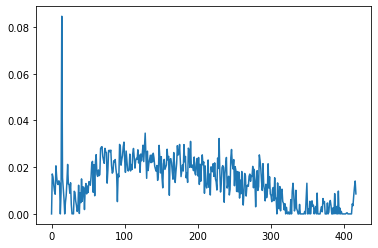

In [ ]:
plt.plot(mi_score)
plt.show

In [ ]:
# prepare dataset 2, MI > 0.2
mi_score_selected_index = np.where(mi_score > 0.01)[0]
X_2 = X[:, mi_score_selected_index]
X_train_2, X_test_2, y_train, y_test = train_test_split(
    X_2, y, random_state=0, stratify=y
)


TypeError: ignored

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif


In [ ]:

selector = SelectPercentile(mutual_info_classif, percentile=20)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape


(16663, 84)

In [ ]:

cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns


['zero_crossing_rate_0',
 'tempogram_29',
 'tempogram_34',
 'tempogram_40',
 'tempogram_41',
 'tempogram_42',
 'tempogram_43',
 'tempogram_44',
 'tempogram_46',
 'tempogram_47',
 'tempogram_48',
 'tempogram_51',
 'tempogram_52',
 'tempogram_53',
 'tempogram_54',
 'tempogram_58',
 'tempogram_60',
 'tempogram_66',
 'tempogram_67',
 'tempogram_69',
 'tempogram_70',
 'tempogram_71',
 'tempogram_72',
 'tempogram_73',
 'tempogram_75',
 'tempogram_76',
 'tempogram_80',
 'tempogram_84',
 'tempogram_85',
 'tempogram_86',
 'tempogram_88',
 'tempogram_90',
 'tempogram_91',
 'tempogram_92',
 'tempogram_93',
 'tempogram_95',
 'tempogram_97',
 'tempogram_98',
 'tempogram_99',
 'tempogram_100',
 'tempogram_101',
 'tempogram_102',
 'tempogram_104',
 'tempogram_106',
 'tempogram_107',
 'tempogram_110',
 'tempogram_112',
 'tempogram_117',
 'tempogram_120',
 'tempogram_123',
 'tempogram_127',
 'tempogram_131',
 'tempogram_132',
 'tempogram_133',
 'tempogram_135',
 'tempogram_136',
 'tempogram_137',
 'tem

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=4)


nb = GaussianNB()

nb=nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = nb.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))




Accuracy 0.312031203120312
Accuracy train 0.31387846961740434


In [ ]:
classifier = svm.SVC(kernel='rbf',C=10)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.39813981398139814
Accuracy train 0.4239309827456864


### gridsearch for svm

In [ ]:
X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = [
   {"kernel": ["poly"], 'degree' : [2, 3, 4],'C' : [1, 10], 'gamma' : [0.01, 0.03]},
   {"kernel": ["linear"], "C": [1, 10]},
    {"kernel": ["rbf"], "gamma": [0.1, 0.3, 0.5], "C": [1, 10]}
]

clf = GridSearchCV(
    estimator=svm.SVC(),
    param_grid=tuned_parameters,
     scoring='accuracy',
     cv=5,
     verbose=0
)
clf.fit(X_train, y_train)
print(clf.best_params_)

In [ ]:
classifier = svm.SVC(kernel='rbf',C=1,gamma=0.1)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = classifier.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.7611761176117612
Accuracy train 0.8308327081770442


## decision tree with mutual information and scaling

In [ ]:
from sklearn.preprocessing import StandardScaler,scale

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=4)
X_train = scale(X_train)
#X_train = sc.fit_transform(X_train)
X_test=scale(X_test)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy' ,accuracy_score(y_test, y_pred))
y_pred1 = clf.predict(X_train)
print('Accuracy train' ,accuracy_score(y_train, y_pred1))

Accuracy 0.633063306330633
Accuracy train 1.0
